In [1]:
from utils import *
from scipy import optimize
from scipy.stats import qmc
from scipy.stats import pearsonr
import matplotlib as mpl
import pandas as pd

In [2]:
lh = qmc.LatinHypercube(1, seed=23548709)
def sample(low, high, n):
    smpl = lh.random(n)
    smpl = qmc.scale(smpl, low, high)
    smpl = np.sort(smpl.ravel())
    return smpl

In [2]:
def g(ell, gp, mean_ntk, data):
    try:
        gp.set_params(**{'kernel__k2__length_scale': ell})
    except:
        gp.set_params(**{'kernel__k1__k2__length_scale': ell})


    gp.fit(data[0], data[1])
    mean = gp.predict(data[2])
    
    return np.sqrt(np.mean((mean_ntk - mean)**2))

In [90]:
# z = np.linspace(-2, 2, 100)
# t = np.linspace(-4 * np.pi, 4 * np.pi, 100)
# x = (z**2 + 1) * np.sin(t)
# y = (z**2 + 1) * np.cos(t)

# datasets = processing(x, y, z, noise = 0.15)
# X, y = datasets['orig']
# X_norm, _ = datasets['norm']
# X_train, y_train, y_train_noisy = datasets['orig train']
# X_norm_train, _, _ = datasets['norm train']

# X_test, y_test = datasets['orig test']
# X_norm_test, y_norm_test = datasets['norm test']

(50, 1)

In [3]:
np.random.seed(12435908)
noise = 0.15

linear = np.linspace(0, 99, 100, dtype=int)
train_index = np.sort(np.random.choice(linear, 50, replace=False))
test_index = np.delete(linear, train_index)

z = np.linspace(-2, 2, 100)
t = np.linspace(-2*np.pi, 2*np.pi, 100)
x = (z**2 + 1) * np.sin(t)
y = (z**2 + 1) * np.cos(t)

X, y, y_noisy = np.column_stack((x,y)), z.reshape(-1,1), np.random.normal(z, scale=noise).reshape(-1,1)

X_train, y_train, y_train_noisy = X[train_index], y[train_index], y_noisy[train_index]
X_norm_train = normalize(X_train, axis=1)

X_test, y_test, y_test_noisy = X[test_index], y[test_index], y_noisy[test_index]
X_norm_test = normalize(X_test, axis=1)

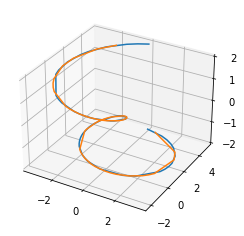

In [4]:
plt.subplot(projection='3d')
plt.plot(X_train[:,0], X_train[:,1], y_train.ravel())
plt.plot(X_test[:,0], X_test[:,1], y_test.ravel())

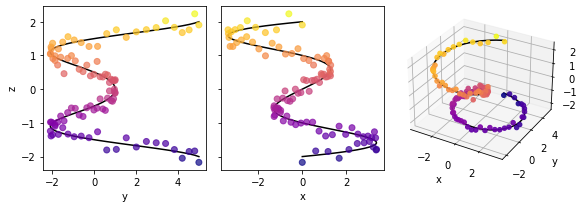

In [5]:
# fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$", figsize=(8, 2.5))

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (8,3), sharey=True)
ax[2].remove()
ax[2] = plt.subplot(1,3,3,projection='3d')
ax[2].patch.set_alpha(0)
ax[2].plot(X[:,0], X[:,1], y.ravel(), c='black')
ax[2].scatter(X[:,0], X[:,1], y_noisy, c=y_noisy, cmap='plasma', alpha=.9)
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')

ax[1].plot(X[:,0], y.ravel(), c='black', zorder=0)
ax[1].scatter(X[:,0], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[1].set_xlabel('x')
# ax[1].set_ylabel('z')

ax[0].plot(X[:,1], y.ravel(), c='black', zorder=0)
ax[0].scatter(X[:,1], y_noisy, c=y_noisy, alpha=.7, cmap='plasma')
ax[0].set_xlabel('y')
ax[0].set_ylabel('z')

fig.tight_layout()

fig.savefig('./illustrative/dataset.svg')

In [6]:
depths=(3,25,100)
arrays = [
    ['Parametric'],
    # [False, True],  # Norm
    [False, True],  # Noise
    # depths,
    # ['fixed', 'unfixed']
]

index = pd.MultiIndex.from_product(
    arrays, names=["Dataset", "Noise"])


df_gaus_rd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_gaus_sd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_lap_rd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_lap_sd = pd.DataFrame(
    index=index,
    columns=['D3rmse', 'D25rmse',  'D100rmse', 'D3corr', 'D25corr', 'D100corr'])

df_gaus_rd

D3rmse D25rmse D100rmse D3corr D25corr D100corr
Dataset    Noise                                                
Parametric False    NaN     NaN      NaN    NaN     NaN      NaN
           True     NaN     NaN      NaN    NaN     NaN      NaN

X_norm_noisy
0.522**2 * NTK(depth=3, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.792)
0.522**2 * Matern(length_scale=1, nu=0.5) + WhiteKernel(noise_level=0.792)
0.522**2 * Matern(length_scale=0.824, nu=inf) + WhiteKernel(noise_level=0.792)
0.363**2 * NTK(depth=25, c=2.000, bias=0.000) + WhiteKernel(noise_level=0.894)
0.363**2 * Matern(length_scale=0.165, nu=0.5) + WhiteKernel(noise_level=0.894)
0.363**2 * Matern(length_scale=0.12, nu=inf) + WhiteKernel(noise_level=0.894)
7.64e-05**2 * NTK(depth=100, c=2.000, bias=88.295) + WhiteKernel(noise_level=1)
7.64e-05**2 * Matern(length_scale=0.0669, nu=0.5) + WhiteKernel(noise_level=1)
7.64e-05**2 * Matern(length_scale=0.0447, nu=inf) + WhiteKernel(noise_level=1)


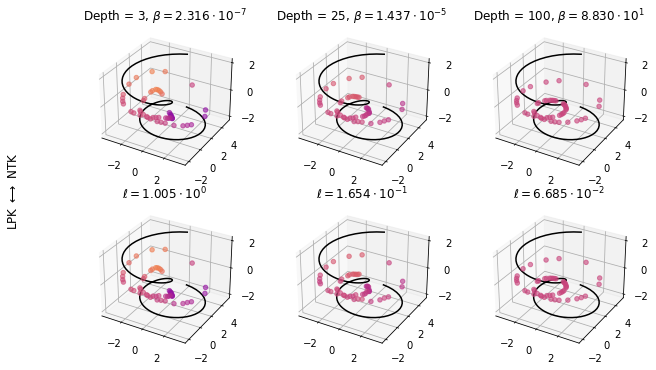

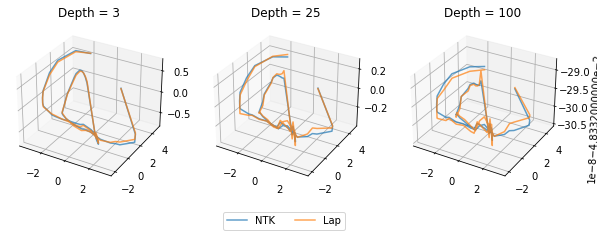

In [24]:
noisy = True
norm = True
name = 'X'

data = [X_train, y_train, X_test]
if norm: 
    name += '_norm'
    data = [X_norm_train, y_train, X_norm_test]
if noisy: 
    name += '_noisy'
    data[1] = y_train_noisy
print(name)

loc = ('Parametric', noisy)
alpha = 1e-5

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10,6), subplot_kw={'projection': '3d'})
ax = ax.ravel()
for a in ax:
    a.patch.set_alpha(0)
    a.plot(X[:,0], X[:,1], y.ravel(), c='black')

fig_ov, ax_ov = plt.subplots(ncols=3, nrows=1, figsize=(10,3), subplot_kw={'projection': '3d'})
ax_ov = ax_ov.ravel()
for a in ax_ov:
    a.patch.set_alpha(0)

cmap = 'plasma'
nrm = plt.Normalize(np.min(y),np.max(y))

for depth in (3, 25, 100):


    #########################
    # Neural tangent Kernel #
    #########################


    ntk = (
        ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
        NTK(depth=depth, c=2, bias=0.1, 
            bias_bounds=(1e-9, 1e5))
    )

    if noisy:
        ntk += WhiteKernel(
            noise_level=0.15**2, 
            noise_level_bounds=(1e-4, 1e1)
        )

    gp_ntk = GPR(kernel=ntk, alpha=alpha, normalize_y=True,  n_restarts_optimizer=9, random_state=3480795)
    gp_ntk.fit(data[0], data[1])
    mean_ntk = gp_ntk.predict(data[2])

    print(gp_ntk.kernel_)

    if noisy:
        const_val = gp_ntk.kernel_.get_params()['k1__k1__constant_value']
    else :
        const_val = gp_ntk.kernel_.get_params()['k1__constant_value']


    #########################
    #     Laplace Kernel    #
    #########################


    lpk = (
        ConstantKernel(
            constant_value=const_val,
            constant_value_bounds='fixed'
        ) *
        Matern(
            nu=1/2,
            length_scale=1,
            length_scale_bounds='fixed'
        ) 
    )

    if noisy: 
        lpk += WhiteKernel(
            noise_level=gp_ntk.kernel_.get_params()['k2__noise_level'],
            noise_level_bounds='fixed'
        )

    gp_lpk = GPR(kernel=lpk, alpha=alpha, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)

    ell_lpk = optimize.minimize_scalar(g, args=(
        gp_lpk, mean_ntk, data), 
        method='bounded', bounds=[1e-4, 1e-3], options={'maxiter': 10000})
    for i in range(-2, 6):
        tmp = optimize.minimize_scalar(g, args=(
            gp_lpk, mean_ntk, data),
            method='bounded', bounds=[1e-4, 10**i], options={'maxiter': 10000})
        if tmp.fun < ell_lpk.fun:
            ell_lpk = tmp

    try:
        gp_lpk.set_params(**{'kernel__k2__length_scale': ell_lpk.x})
    except:
        gp_lpk.set_params(**{'kernel__k1__k2__length_scale': ell_lpk.x})
    gp_lpk.fit(data[0], data[1])
    mean_lpk_opt = gp_lpk.predict(data[2])

    print(gp_lpk.kernel_)


    #########################
    #    Gaussian Kernel    #
    #########################


    gaus = (
        ConstantKernel(
            constant_value=const_val,
            constant_value_bounds='fixed'
        ) *
        Matern(
            nu=np.inf,
            length_scale=1,
            length_scale_bounds='fixed'
        ) 
    )

    if noisy: 
        gaus += WhiteKernel(
            noise_level=gp_ntk.kernel_.get_params()['k2__noise_level'],
            noise_level_bounds='fixed'
        )

    gp_gaus = GPR(kernel=gaus, alpha=alpha, normalize_y=True, n_restarts_optimizer=0, random_state=3480795)

    ell_gaus = optimize.minimize_scalar(g, args=(
        gp_gaus, mean_ntk, data), 
        method='bounded', bounds=[1e-4, 1e-3], options={'maxiter': 10000})
    for i in range(-2, 6):
        tmp = optimize.minimize_scalar(g, args=(
            gp_gaus, mean_ntk, data),
            method='bounded', bounds=[1e-4, 10**i], options={'maxiter': 10000})
        if tmp.fun < ell_gaus.fun:
            ell_gaus = tmp

    try:
        gp_gaus.set_params(**{'kernel__k2__length_scale': ell_gaus.x})
    except:
        gp_gaus.set_params(**{'kernel__k1__k2__length_scale': ell_gaus.x})
    gp_gaus.fit(data[0], data[1])
    mean_gaus_opt = gp_gaus.predict(data[2])

    print(gp_gaus.kernel_)


    if norm:
        df_lap_sd[f'D{depth}rmse'][loc] = f'{ell_lpk.fun:.3e}'
        df_gaus_sd[f'D{depth}rmse'][loc] = f'{ell_gaus.fun:.3e}'
        df_lap_sd[f'D{depth}corr'][loc] = np.corrcoef((mean_ntk)[:,0], (mean_lpk_opt)[:,0])[0, 1]
        df_gaus_sd[f'D{depth}corr'][loc] = np.corrcoef((mean_ntk)[:,0], (mean_gaus_opt)[:,0])[0, 1]
    else:
        df_lap_rd[f'D{depth}rmse'][loc] = f'{ell_lpk.fun:.3e}'
        df_gaus_rd[f'D{depth}rmse'][loc] = f'{ell_gaus.fun:.3e}'
        df_lap_rd[f'D{depth}corr'][loc] = np.corrcoef((mean_ntk)[:,0], (mean_lpk_opt)[:,0])[0, 1]
        df_gaus_rd[f'D{depth}corr'][loc] = np.corrcoef((mean_ntk)[:,0], (mean_gaus_opt)[:,0])[0, 1]



    if depth==3: i,j=0,3
    if depth==25: i,j=1,4
    if depth==100: i,j=2,5

    if noisy:
        beta = gp_ntk.kernel_.get_params()['k1__k2__bias']
        ell = gp_lpk.kernel_.get_params()['k1__k2__length_scale']
    else:
        beta = gp_ntk.kernel_.get_params()['k2__bias']
        ell = gp_lpk.kernel_.get_params()['k2__length_scale']

    ax[i].scatter(X_test[:,0], X_test[:,1], mean_ntk.ravel(), c=mean_ntk.ravel(), alpha=0.6, cmap='plasma', norm=nrm)
    # ax[i].plot(X_test[:,0], X_test[:,1], mean_ntk.ravel())
    a,b = f'{beta:.3e}'.split('e')
    b = int(b)
    ax[i].set_title(f"Depth = {depth}, " + rf'$\beta = {a}\cdot 10^{{{b}}}$')
    ax[j].scatter(X_test[:,0], X_test[:,1], mean_lpk_opt.ravel(), c=mean_lpk_opt.ravel(), alpha=0.6, cmap='plasma', norm=nrm)
    # ax[j].plot(X_test[:,0], X_test[:,1], mean_lpk_opt.ravel())
    a,b = f'{ell:.3e}'.split('e')
    b = int(b)
    ax[j].set_title(rf'$\ell = {a}\cdot 10^{{{b}}}$')

    ax_ov[i].plot(X_test[:,0], X_test[:,1], mean_ntk.ravel(), alpha=0.7)
    ax_ov[i].plot(X_test[:,0], X_test[:,1], mean_lpk_opt.ravel(), alpha=0.7)
    # ax_ov[i].scatter(data[2][:,0], data[2][:,1], mean_gaus_opt.ravel(), alpha=0.4)
    ax_ov[i].set_title(f"Depth = {depth}")

fig.supylabel(r'LPK $\longleftrightarrow$ NTK')
fig_ov.legend(['NTK', 'Lap'], loc='lower center', bbox_to_anchor=(0.51, -0.1), ncol=2)

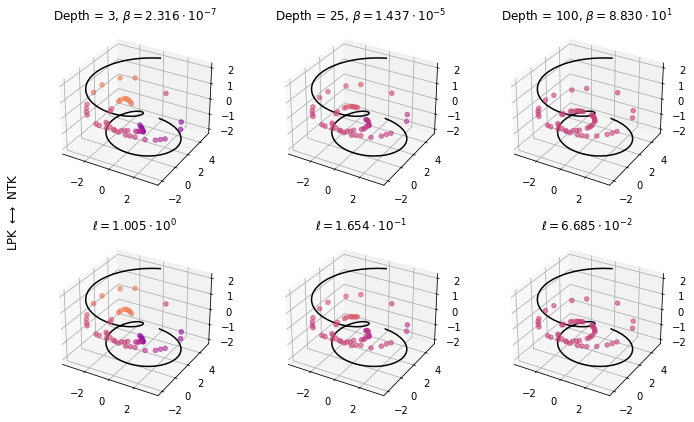

In [25]:
fig.tight_layout()
fig.savefig(f'./illustrative/{name}.svg')
fig

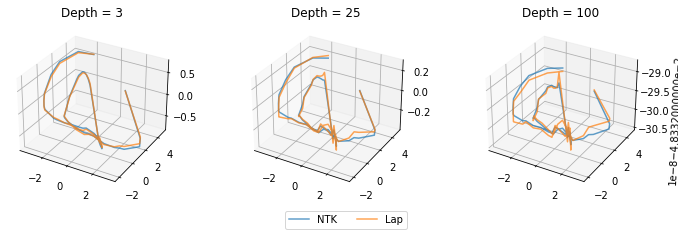

In [26]:
fig_ov.tight_layout()
fig_ov.savefig(f'./illustrative/{name}_ov.svg')
fig_ov

In [36]:
print(df_lap_rd.to_latex())

\begin{tabular}{llllllll}
\toprule
           &      &     D3rmse &    D25rmse &   D100rmse &    D3corr &   D25corr &  D100corr \\
Dataset & Noise &            &            &            &           &           &           \\
\midrule
Parametric & False &  3.357e-01 &  5.648e-01 &  3.444e-01 &  0.923526 &  0.319749 &   0.00705 \\
           & True &  4.259e-01 &  2.469e-01 &  1.207e-01 &  0.961488 &  0.893334 &  0.812863 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1739815/1189998363.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_lap_rd.to_latex())


In [32]:
print(df_gaus_rd.to_latex())

\begin{tabular}{llllllll}
\toprule
           &      &     D3rmse &    D25rmse &   D100rmse &    D3corr &   D25corr &  D100corr \\
Dataset & Noise &            &            &            &           &           &           \\
\midrule
Parametric & False &  2.730e-01 &  4.736e-01 &  3.444e-01 &  0.952145 &  0.766617 &  0.011563 \\
           & True &  3.548e-01 &  1.881e-01 &  1.357e-01 &  0.974037 &   0.93753 &  0.757767 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1739815/626565025.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_gaus_rd.to_latex())


In [33]:
print(df_lap_sd.to_latex())

\begin{tabular}{llllllll}
\toprule
           &      &     D3rmse &    D25rmse &   D100rmse &    D3corr &   D25corr &  D100corr \\
Dataset & Noise &            &            &            &           &           &           \\
\midrule
Parametric & False &  2.496e-02 &  4.015e-02 &  1.174e-01 &  0.999774 &   0.99919 &  0.980372 \\
           & True &  3.142e-02 &  2.973e-02 &  1.102e-09 &  0.998362 &  0.986742 &  0.954045 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1739815/4144950733.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_lap_sd.to_latex())


In [34]:
print(df_gaus_sd.to_latex())

\begin{tabular}{llllllll}
\toprule
           &      &     D3rmse &    D25rmse &   D100rmse &    D3corr &   D25corr &  D100corr \\
Dataset & Noise &            &            &            &           &           &           \\
\midrule
Parametric & False &  3.610e-01 &  3.669e-01 &  3.004e-01 &   0.95093 &  0.943283 &   0.85578 \\
           & True &  4.122e-02 &  5.915e-02 &  2.017e-09 &  0.997988 &  0.951311 &  0.825914 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_1739815/3546313798.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_gaus_sd.to_latex())


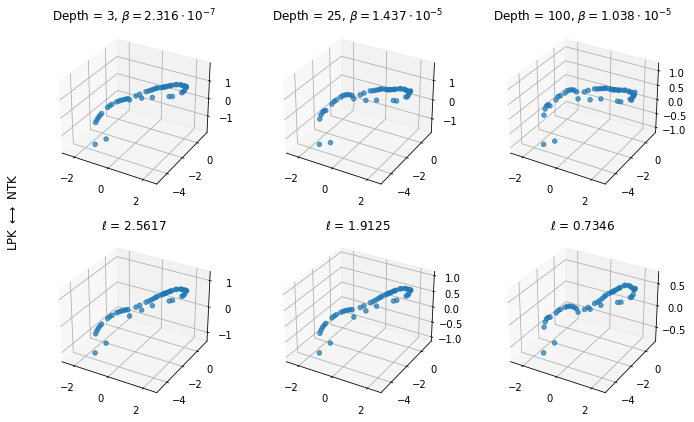

In [26]:
fig.tight_layout()
fig.savefig(f'./illustrative/{name}.svg')
fig

In [ ]:
print(df.to_latex(escape=False))